This post is based on [this article](https://towardsdatascience.com/matplotlib-seaborn-pandas-an-ideal-amalgamation-for-statistical-data-visualisation-f619c8e8baa3) on Medium, titled "Matplotlib+ Seaborn + Pandas: An Ideal Amalgamation for Statistical Data Visualisation." This article was recommended on a public Facebook group that I happened to be a part of, and I'm glad I came across it.

Although I have used Matplotlib, seaborn, and pandas before, my use case was very limited since I only used them in toy projects or tutorial blog posts. While this is a tutorial blog post of its own, today's focus is specifically going to be around learning how to use these libraries effectively and understanding some commonly overlooked details on those mo. Specifically, the goals of this post can be boiled down as follows:

* Matplotlib basics and terminology review
* Integrating seaborn with pandas to create multidimensional plots with minimal code
* Plot customization with seaborn and Matplotlib

And if you're crazy about details like I am and is wondering why I follow inconsistent capitalization with module names, it's because Matplotlib capitalizes the name of the module on [their website](https://matplotlib.org/), whereas [seaborn](https://seaborn.pydata.org) and [pandas](https://pandas.pydata.org) don't. 

With that detail out of the way, let's get started!

# Revisiting Matplotlib

Matplotlib is one of the most widely used data visualization libraries in Python. It is also the backend on which seaborn is built. In other words, seaborn uses Matplotlib behind the scenes. Hence, to understand data visualization with Python, we must have some level of decent understanding of how Matplotlib works.

A typical Matplotlib figure can be decomposed into the following segments. This image was taken from the Medium article.

<img src='https://miro.medium.com/max/1400/1*LbrEFtcSkNMfROHeM1ztmw.png' />

Previously, one point of confusion for me was the difference between figure, axes, and axis. Let's get into more detail of what these are.

* Figure: Refers to the entire image that is created by Matplotlib. A figure can, of course, contain multiple subplots within it. 

* Axes: Nearly synonymous with subplots. A single figure can often contain multiple axes.

* Axis: The actual axis of the graph, as in the $x$ and $y$-axis in a two-dimensional plot.

The distinction between figure and axes are important, as these concepts are also directly relevant with how seaborn functions can be called to create subplots in conjunction with Matplotlib.

For the sake of demonstration, let's import some modules and write up some code.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.random.seed(123)

Normally, I like to configure Matplotlib to have some style settings, such as `plt.style.use("seaborn")`, but we will pass on that for today as we will be using the seaborn library itself. This will help us easily differentiate between graphs that were created through Matplotlib as seaborn.

Here is a very simple example of graph creation using `axes`. Note that we can obtain both the figure and the axes by calling `plt.subplot()`, with `nrows * ncols` determining the number of subplots or axes that will be made available to us. In this case, we have one subplot in a figure.

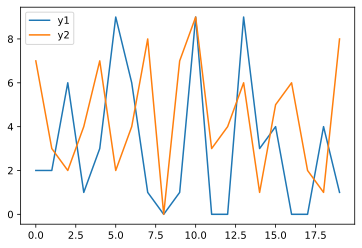

In [2]:
x = range(20)
y1 = np.random.randint(low=0, high=10, size=(20,))
y2 = np.random.randint(low=0, high=10, size=(20,))

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(x, y1, label='y1')
axes.plot(x, y2, label='y2')
axes.legend()
plt.show()

An interesting behavior of Matplotlib worth noting with the `plt.subplots()` function call is that the type of the `axes` object depends on the number of subplots to be created. Below is the case in which there is only one subplot:

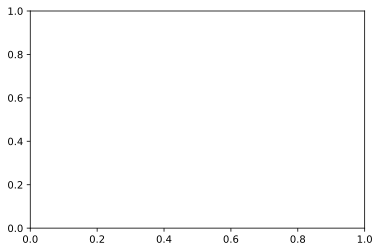

In [3]:
_, axes = plt.subplots(nrows=1, ncols=1); axes

And here is the case of many subplots:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f295743cf98>,
      dtype=object)

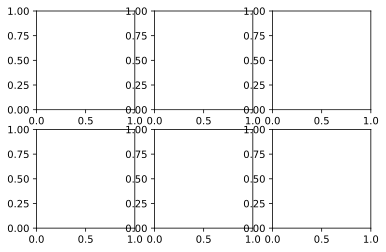

In [4]:
_, axes = plt.subplots(nrows=2, ncols=3); axes

As you can see, in the case of many subplots, the returned `axes` object is a NumPy array whose elements are `matplotlib.axes._subplots.AxesSubplot object`s. Hence we can do the following:

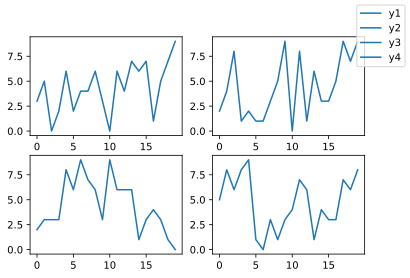

In [5]:
def generate_random_data(size, low=0, high=10):
    return np.random.randint(low=low, high=high, size=size)

SIZE = 20
x = range(SIZE)
y1, y2, y3, y4 = [generate_random_data((SIZE,)) for _ in range(4)]

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].plot(x, y1, label="y1")
axes[0, 1].plot(x, y2, label="y2")
axes[1, 0].plot(x, y3, label="y3")
axes[1, 1].plot(x, y4, label="y4")
fig.legend()
plt.show()

In this case, the `axes` obect is a NumPy array whose shape is `(2, 2)`. Therefore, we can access individual `axes` objects by two-dimensional NumPy indexing, *i.e.* `array[row_index, col_index]`. Note that when `nrows == 1`, the shape will take the form of `(ncols, )` instead of `(1, ncols)`. 

# Seaborn and Pandas

Now that we have some idea of how to manipulate axes and subplots in Matplotlib, let's get the fuller picture by creating graphs using Matplotlib, seaborn, and pandas, as promised earlier. To do this, we will first need some dummy dataset. We could create them as we had done above, but there are limitations to this approach since ideally we would need pandas dataframes. Instead, let's use seaborn to load some classic datasets.


In [6]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## Pandas Series

To create plots with Matplotlib, we need `x` and `y` values. These values should be iterables, such as lists, tuples, or numpy arrays. One point to note is that each series in a pandas dataframe is also an iterable type. We can obtain the series by calling `.values` on a column, as shown below.

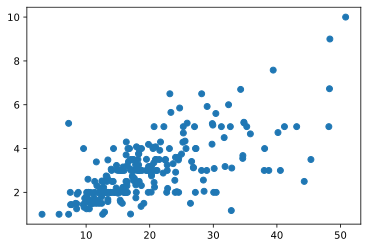

In [7]:
plt.scatter(tips["total_bill"].values, tips["tip"].values)
plt.show()

An alternative method is to simply specify the the column names and then pass in the entire dataframe as a `data` argument.

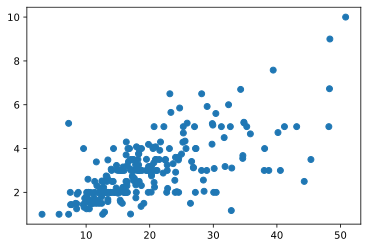

In [8]:
plt.scatter(x="total_bill", y="tip", data=tips)
plt.show()


The syntax for seaborn is not so much different. In fact, it is almost identical, with the `.scatterplot` call being the exception. seaborn applies some stylistic changes by default, which I personally prefer over Matplotlib's defaults.

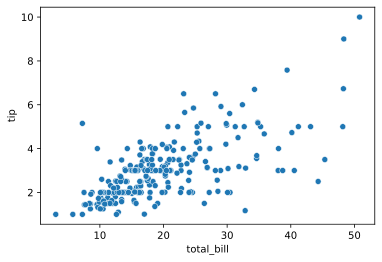

In [9]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

## Axes Integration

You might be thinking that the choice between seaborn and Matplotlib is a mutually exclusive one, *i.e.* we cannot use both libraries in one figure. Well, turns out that this is not true, which is good news for us, since we can pick and choose which library we want for each subplot depending on the type of visualization we want to create.

Let's start with a vanilla example in which we use Matplotlib to create a figure containing two subplots. 

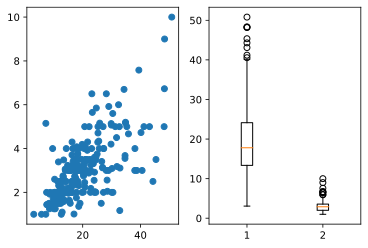

In [10]:
fig,axes = plt.subplots(1,2)
axes[0].scatter(x='total_bill', y='tip', data=tips)
axes[1].boxplot(tips[['total_bill','tip']].to_numpy())
plt.show()

Note that we used `.to_numpy()` call in order to transform the dataframe into a numpy array. While this works, I personally think it's better to use seaborn in this case. So let's leave the subplot on the left as is, and replace the boxplot with a seaborn boxplot.

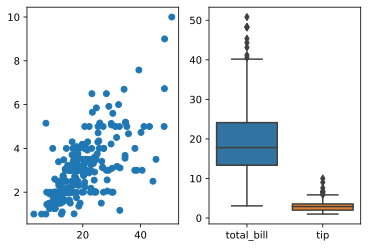

In [11]:
fig,axes = plt.subplots(1,2)
axes[0].scatter(x='total_bill', y='tip', data=tips)
sns.boxplot(data=tips[['total_bill','tip']], ax=axes[1])
plt.show()

That looks a lot better. For one, the syntax is less convoluted in the sense that it does not require `.to_numpy()` or any other type of conversion process; seaborn knows how to deal with pandas dataframes. Also, because it can natively process dataframes, it was able to retrieve the column names and display them correctly below, even without any customizations applied. 

One interesting thing to note is that, we can also use the built-in visualization functionality that pandas has in order to create the boxplot. The code for this example is shown below.

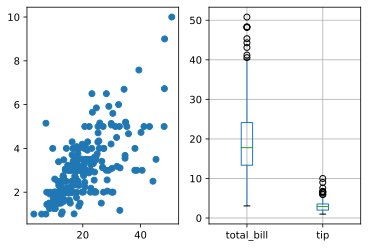

In [12]:
fig,axes = plt.subplots(1,2)
axes[0].scatter(x='total_bill', y='tip', data=tips)
axes[1] = tips.boxplot(column=['total_bill','tip'])
plt.show()


I think it's pretty cool that we can use select and combine different libraries to create plots. This opens a lot of room for customization and visualization improvements, which are always valuable when trying to derive hidden insight.

# Conclusion

In this post, we took a look at the basics of data visualization with Matplotlib and seaborn. Although I call myself a Pythonista, I've always felt that data visualization and basic data wrangling with libraries like Matplotlib or Pandas are my weak points. I hope to continue studying the basics to continuously improve in these domains.

On a side note, you might be wondering at this point what the merits of using seaborn is, other than the fact that it produces prettier-looking plots than Matplotlib. One of the defining strengths of seaborn is figure-level plots, which allows one to create complicated plots across many axes with just a few lines of code. Such examples include `FacetGrid`, `PairGrid`, and `JointGrid`. In a future post, I hope to explore these plots in more detail. 

I hope you've enjoyed reading this post. Stay tuned for more!